In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf 
import tensorflow.keras as keras 
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
pd.set_option('display.max_columns', None)
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head(5)
ids = test[['PassengerId']] # I will use Passenger Ids in the final csv file.

<AxesSubplot:xlabel='Sex', ylabel='count'>

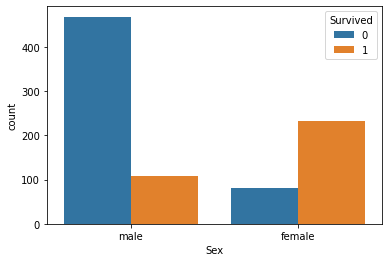

In [4]:
sns.countplot(x='Sex', hue='Survived', data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

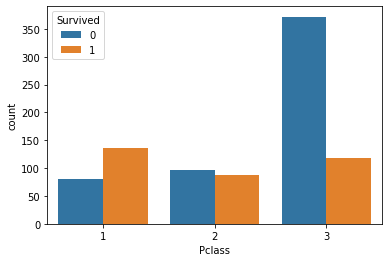

In [5]:
sns.countplot(x='Pclass', hue='Survived', data=train)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

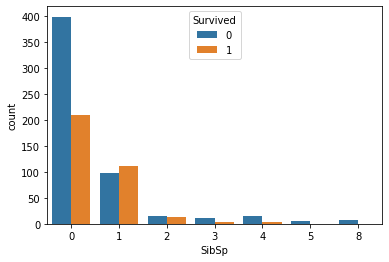

In [6]:
sns.countplot(x='SibSp', hue='Survived', data=train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

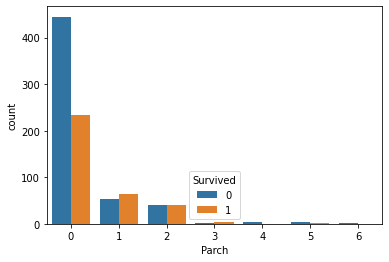

In [7]:
sns.countplot(x='Parch', hue='Survived', data=train)


<AxesSubplot:xlabel='Embarked', ylabel='count'>

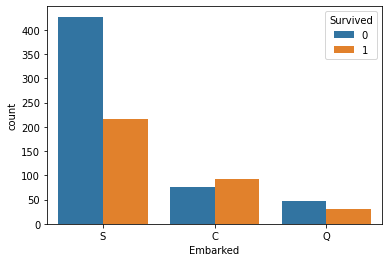

In [8]:
sns.countplot(x='Embarked', hue='Survived', data=train)

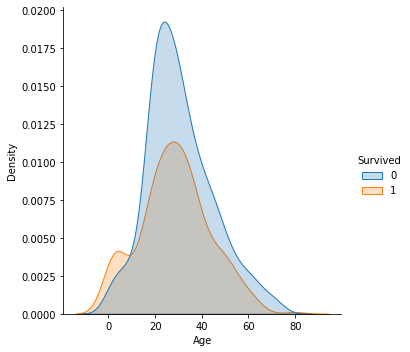

In [9]:

sns.displot(data=train, x='Age', kind='kde', hue='Survived', fill=True)

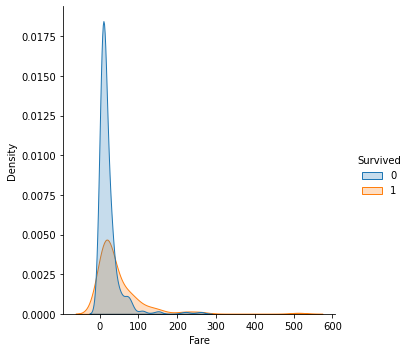

In [10]:
sns.displot(data=train, x='Fare', kind='kde', hue='Survived', fill=True)

<AxesSubplot:>

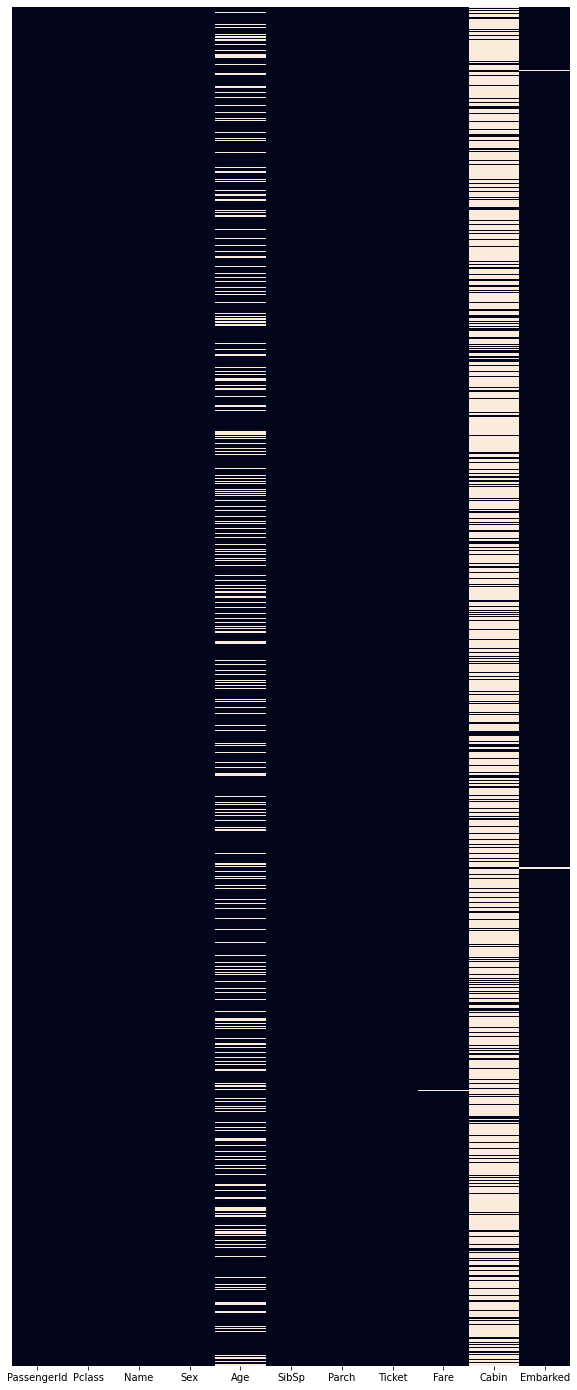

In [11]:
combined = pd.concat([train.drop('Survived',axis=1),test])
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,25))
sns.heatmap(combined.isnull(),yticklabels=False,cbar=False)

In [12]:
combined.info()
combined_2 = combined

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [13]:
combined = pd.concat([train, test], axis=0, sort=False)
#Age Column
combined['Age'].fillna(combined['Age'].median(),inplace=True) # Age
combined['Embarked'].fillna(combined['Embarked'].value_counts().index[0], inplace=True) # Embarked
combined['Fare'].fillna(combined['Fare'].median(),inplace=True)
d = {1:'1st',2:'2nd',3:'3rd'} #Pclass
combined['Pclass'] = combined['Pclass'].map(d) #Pclass
combined['Child'] = train['Age'].apply(lambda age: 1 if age>=18 else 0) # creating child feature based on earlier plot

In [14]:
# using sklearn KNN permutations


In [15]:
combined.iloc[:10]['Name']

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [16]:

# Example Input --> 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
combined['Title'] = combined['Name'].str.split('.').str.get(0)  # output : 'Futrelle, Mrs'
combined['Title'] = combined['Title'].str.split(',').str.get(1) # output : 'Mrs '
combined['Title'] = combined['Title'].str.strip()           

In [17]:
combined.groupby('Title').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
Title,,,,,,,,,,,,,
Capt,1,1,1,1,1,1,1,1,1,1,1,1,1
Col,4,2,4,4,4,4,4,4,4,4,3,4,4
Don,1,1,1,1,1,1,1,1,1,1,0,1,1
Dona,1,0,1,1,1,1,1,1,1,1,1,1,1
Dr,8,7,8,8,8,8,8,8,8,8,4,8,8
Jonkheer,1,1,1,1,1,1,1,1,1,1,0,1,1
Lady,1,1,1,1,1,1,1,1,1,1,1,1,1
Major,2,2,2,2,2,2,2,2,2,2,2,2,2
Master,61,40,61,61,61,61,61,61,61,61,9,61,61


In [18]:
french_titles = ['Don', 'Dona', 'Mme', 'Ms', 'Mra','Mlle']
english_titles = ['Mr', 'Mrs','Mrs','Mrs','Mrs','Miss']
for i in range(len(french_titles)):
    for j in range(len(english_titles)):
        if i == j:
            combined['Title'] = combined['Title'].str.replace(french_titles[i],english_titles[j])

In [19]:
major_titles = ['Mr','Mrs','Miss','Master'] # And we will also have others for the other titles.
combined['Title'] = combined['Title'].apply(lambda title: title if title in major_titles else 'Others')


In [20]:
#Dropping the Irrelevant Columns
combined.drop(['PassengerId','Name','Ticket','Cabin'], 1, inplace=True)

# Getting Dummy Variables and Dropping the Original Categorical Variables
categorical_vars = combined[['Pclass','Sex','Embarked','Title','Child']] # Get Dummies of Categorical Variables
dummies = pd.get_dummies(categorical_vars,drop_first=True)
combined = combined.drop(['Pclass','Sex','Embarked','Title','Child'],axis=1)
combined = pd.concat([combined, dummies],axis=1)
print(combined)
# Separating Train and Test Datasets
test = combined[combined['Survived'].isnull()].drop(['Survived'],axis=1)
train = combined[combined['Survived'].notnull()]

     Survived   Age  SibSp  Parch      Fare  Child  Pclass_2nd  Pclass_3rd  \
0         0.0  22.0      1      0    7.2500      1           0           1   
1         1.0  38.0      1      0   71.2833      1           0           0   
2         1.0  26.0      0      0    7.9250      1           0           1   
3         1.0  35.0      1      0   53.1000      1           0           0   
4         0.0  35.0      0      0    8.0500      1           0           1   
..        ...   ...    ...    ...       ...    ...         ...         ...   
413       NaN  28.0      0      0    8.0500      0           0           1   
414       NaN  39.0      0      0  108.9000      1           0           0   
415       NaN  38.5      0      0    7.2500      0           0           1   
416       NaN  28.0      0      0    8.0500      1           0           1   
417       NaN  28.0      1      1   22.3583      1           0           1   

     Sex_male  Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Ti

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [21]:
y = train['Survived']
X = train.drop(['Survived'],1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
test = sc.fit_transform(test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [22]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units=10,kernel_initializer='uniform',activation='relu',input_dim=14))
    classifier.add(Dropout(rate = 0.2))
    classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dropout(rate = 0.2))
    classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return classifier

In [23]:

from sklearn.model_selection import GridSearchCV
classifier = KerasClassifier(build_fn = build_classifier)
param_grid = dict(optimizer = ['Adam'],
                  epochs=[10, 20, 50],
                  batch_size=[16, 25, 32])
grid = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy')
grid_result = grid.fit(X, y)
best_parameters = grid.best_params_
best_accuracy = grid.best_score_

2021-12-29 10:18:13.171459: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-29 10:18:13.257689: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-29 10:18:13.258594: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-29 10:18:13.260546: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/10
45/45 [==============================] - 1s 3ms/step - loss: 0.6825 - accuracy: 0.6938
Epoch 2/10
45/45 [==============================] - 0s 3ms/step - loss: 0.5766 - accuracy: 0.7963
Epoch 3/10
45/45 [==============================] - 0s 3ms/step - loss: 0.4604 - accuracy: 0.8034
Epoch 4/10
45/45 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.8160
Epoch 5/10
45/45 [==============================] - 0s 4ms/step - loss: 0.4244 - accuracy: 0.8244
Epoch 6/10
45/45 [==============================] - 0s 3ms/step - loss: 0.4223 - accuracy: 0.8258
Epoch 7/10
45/45 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 0.8329
Epoch 8/10
45/45 [==============================] - 0s 3ms/step - loss: 0.4026 - accuracy: 0.8315
Epoch 9/10
45/45 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8315
Epoch 10/10
45/45 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8357
Epoch 1/10
45/45 [=

In [24]:

classifier = KerasClassifier(build_fn = build_classifier,
                             optimizer=best_parameters['optimizer'],
                             batch_size=best_parameters['batch_size'],
                             epochs=best_parameters['epochs'])

classifier.fit(X,y)
preds = classifier.predict(test)

Epoch 1/20
36/36 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.6162
Epoch 2/20
36/36 [==============================] - 0s 2ms/step - loss: 0.5916 - accuracy: 0.7116
Epoch 3/20
36/36 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.7912
Epoch 4/20
36/36 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.8081
Epoch 5/20
36/36 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.8148
Epoch 6/20
36/36 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8249
Epoch 7/20
36/36 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.8159
Epoch 8/20
36/36 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8204
Epoch 9/20
36/36 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8204
Epoch 10/20
36/36 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8361
Epoch 11/20
36/36 [

In [25]:
results = ids.assign(Survived=preds)
results['Survived'] = results['Survived'].apply(lambda row: 1 if row > 0.5 else 0)
results.to_csv('submission.csv',index=False)
results.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
